# TALLER N. 3.
## Punto 1 -b:  Entrenamiento de un undercompleted autoencoder

<p>Integrantes:</p>
<ul>
<li>Juan Camilo Cática</li>
<li>Ricardo Santacruz </li>
<li>Diego Fernando Escobar</li>
</ul>

## Importar librerias

In [148]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
from keras.layers import Input, Dense
from keras.models import Model

## Cargar Datos fashion_mnist

In [149]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [150]:
print("X_train_full Shape :", X_train_full.shape)
print("X_train_full[0] Shape :", X_train_full[0].shape)
print("y_train_full Shape :", y_train_full.shape)


print("X_test Shape       :", X_test.shape)
print("y_test Shape       :", y_test.shape)

X_train_full Shape : (60000, 28, 28)
X_train_full[0] Shape : (28, 28)
y_train_full Shape : (60000,)
X_test Shape       : (10000, 28, 28)
y_test Shape       : (10000,)


## obtener los datos de entrenamiento y validacion
### 5000 para validacion y 55000 para entrenamiento y se normaliza,  maximo valor del pixel = 255

In [151]:

X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [152]:
print ("Dimensiones de la capa de entrada : (" , len(X_train), ",", np.prod(X_train.shape[1:] ), ")")

Dimensiones de la capa de entrada : ( 55000 , 784 )


In [153]:
X_train = X_train.reshape((len(X_train), np.prod(X_train.shape[1:])))
X_valid = X_valid.reshape((len(X_valid), np.prod(X_valid.shape[1:])))
print(X_train.shape)
print( X_valid.shape)

(55000, 784)
(5000, 784)


## Crear modeo undercompleted autoencoder

In [154]:
# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

In [155]:
autoencoder.summary()

Model: "model_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_15 (InputLayer)        (None, 784)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 32)                25120     
_________________________________________________________________
dense_16 (Dense)             (None, 784)               25872     
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


## Crear Moldeo del encoder : Capa que reduce la dimensionalidad

In [157]:
#capa a utilizar o datos que genera esta capa
# this model maps an input to its encoded representation
#entran 784 y salen 32 variables
encoder = Model(input_img, encoded)
encoder.summary()

Model: "model_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_15 (InputLayer)        (None, 784)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 32)                25120     
Total params: 25,120
Trainable params: 25,120
Non-trainable params: 0
_________________________________________________________________


### Otra forma de crear el modelo para encoder

In [158]:
encoder_layer = autoencoder.layers[0]
print(encoder_layer.name)
input_img = Input(shape=(784,))
encoder_layer = autoencoder.layers[1]
print(encoder_layer.name)
encoder1 = Model(input_img, encoder_layer(input_img))
encoder1.summary()

input_15
dense_15
Model: "model_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_16 (InputLayer)        (None, 784)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 32)                25120     
Total params: 25,120
Trainable params: 25,120
Non-trainable params: 0
_________________________________________________________________


In [159]:
autoencoder.layers[-1].name

'dense_16'

## Crear Modelo del decoder: Capa que reconstruye los datos de entrada a partir de la nueva dimensionalidad reducida

In [161]:
#decodificador entran 32 y salen 784 variables
# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))
decoder.summary()

Model: "model_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_18 (InputLayer)        (None, 32)                0         
_________________________________________________________________
dense_16 (Dense)             (None, 784)               25872     
Total params: 25,872
Trainable params: 25,872
Non-trainable params: 0
_________________________________________________________________


In [162]:
# Compilar el modelo
#dado que la funcion de activacion de la capa de salida es sigmoide, la funcion de perdida es : binary_crossentropy
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [163]:
#Entrenar modelo
autoencoder.fit(X_train, X_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(X_valid, X_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/50
55000/55000 [==============================] - 5s 94us/step - loss: 0.5356 - val_loss: 0.4643
Epoch 2/50
55000/55000 [==============================] - 4s 82us/step - loss: 0.4309 - val_loss: 0.4058
Epoch 3/50
55000/55000 [==============================] - 5s 84us/step - loss: 0.3992 - val_loss: 0.3872
Epoch 4/50
55000/55000 [==============================] - 5s 86us/step - loss: 0.3824 - val_loss: 0.3719
Epoch 5/50
55000/55000 [==============================] - 4s 81us/step - loss: 0.3681 - val_loss: 0.3592
Epoch 6/50
55000/55000 [==============================] - 4s 77us/step - loss: 0.3570 - val_loss: 0.3497
Epoch 7/50
55000/55000 [==============================] - 5s 94us/step - loss: 0.3486 - val_loss: 0.3423
Epoch 8/50
55000/55000 [==============================] - 4s 78us/step - loss: 0.3420 - val_loss: 0.3364
Epoch 9/50
55000/55000 [==============================] - 5s 85us/step - loss: 0.3365 - val_loss: 0.3314
Epoch 

In [170]:
#Perdida  evaluacion modelo con datos de test
Xtest = X_test / 255.0
Xtest = Xtest.reshape((len(Xtest), np.prod(Xtest.shape[1:])))
score = autoencoder.evaluate(Xtest, Xtest, verbose=0)
print('Test loss:', score)

Test loss: 0.29826893029212953


In [35]:
# encode and decode some data
# note that we take them from the *test* set
encoded_imgs = encoder.predict(Xtest)
decoded_imgs = decoder.predict(encoded_imgs)

In [171]:
Xtest.shape[0]

10000

### Plot Encoder - Decoder

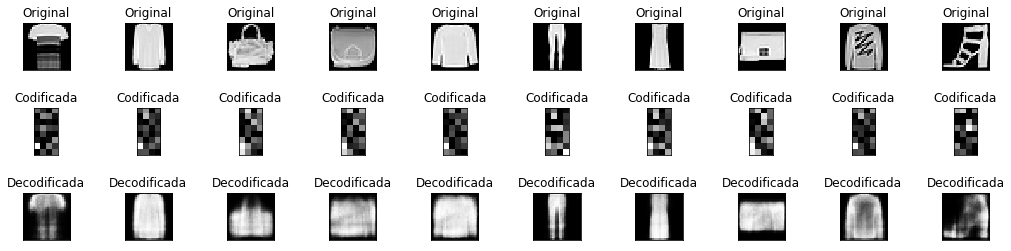

In [183]:
num_images = 10
np.random.seed(42)
random_test_images = np.random.randint(Xtest.shape[0], size=num_images)

encoded_imgs = encoder.predict(Xtest)
#decoded_imgs = autoencoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

plt.figure(figsize=(18, 4))

for i, image_idx in enumerate(random_test_images):
    # plot original image
    ax = plt.subplot(3, num_images, i + 1)
    plt.imshow(X_test[image_idx].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.set_title("Original")
    plt.subplots_adjust(hspace = .8)
    
    # plot encoded image
    ax = plt.subplot(3, num_images, num_images + i + 1)
    plt.imshow(encoded_imgs[image_idx].reshape(8, 4))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.set_title("Codificada")
   
    # plot reconstructed image
    ax = plt.subplot(3, num_images, 2*num_images + i + 1)
    plt.imshow(decoded_imgs[image_idx].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.set_title("Decodificada")
plt.show()

### Plot Evaluación Modelo Autoencoder:  encode  de 10 imágenes de entrada y su reconstrucción a la salida del  decode

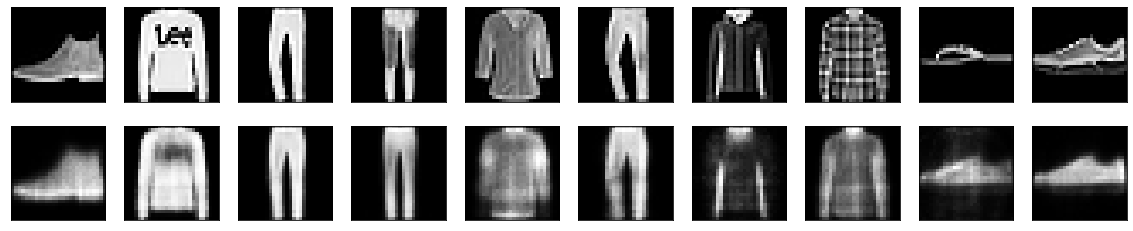

In [37]:
# use Matplotlib (don't ask)
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(Xtest[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [70]:
encoded_imgs.shape

(10000, 32)

In [52]:
decoded_imgs.shape

(10000, 784)

# Modelo MLP

In [184]:
#Modelo MLP con capa de entra de  32 variables generadas por el encoder
def crear_modelo(optimizer='adam', init='normal'):
    modelo1 = keras.models.Sequential()
    modelo1.add(keras.layers.Flatten(input_shape=[32,]))
    modelo1.add(keras.layers.Dense(300,kernel_initializer=init,activation ="relu"))
    modelo1.add(keras.layers.Dense(100,kernel_initializer=init, activation ="relu"))
    modelo1.add(keras.layers.Dense(10,kernel_initializer=init,activation ="softmax"))    
    #modelo.summary()
    modelo1.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer,  metrics=["accuracy"])
    return modelo1

## Datos de entrada generados por modelo encode ( encoded_imgs) 

In [191]:
# Preparar datos 
Xtrainfull = X_train_full / 255.0
Xtrainfull = Xtrainfull.reshape((len(Xtrainfull), np.prod(Xtrainfull.shape[1:])))

#Se gneran los nuevos datos de 32 variables con el encoder para el MLP
encoded_imgs0 = encoder.predict(Xtrainfull)
encoded_imgs0.shape

(60000, 32)

In [285]:
y_train_full.shape

(60000,)

In [264]:
X_train_full.shape

(60000, 28, 28)

### Conjuto de images por clase

In [204]:
# Clases del conjunto de datos
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
"Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
#np.array(class_names)[y_pred].

In [308]:
# Arreglo de imagenes iniciales
val =np.unique(y_train_full)
img_ini = []
y_ini =[]
for i in val:
    indi = np.where(y_train_full == i)[0][0]
    #print(indi)
    y_ini = np.append(y_ini,indi)
    img_ini =np.append(img_ini, X_train_full[indi])

img_ini = np.asarray(img_ini)
y_ini = np.asarray(y_ini)

img_ini =img_ini.reshape(10,28,28)
y_ini =y_ini.reshape(-1)
#print(img_ini.shape)
#print(y_ini)


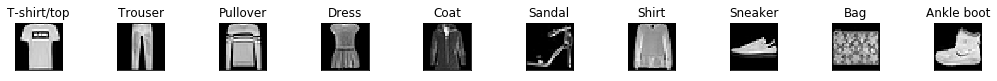

In [309]:
plt.figure(figsize=(18, 4))
for i, image_idx in enumerate(img_ini):
    #print (image_idx)
    
    
    # plot original image
    ax = plt.subplot(3, 10, i + 1)
    plt.imshow(img_ini[i])
    #plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.subplots_adjust(hspace = .8)
    
    clase_real = np.array(class_names)[i]
    ax.set_title(clase_real)
    plt.subplots_adjust(hspace = .8)
    
plt.show()

### Datos de Entrenamiento y Test, obtenidos del encoder: encoded_imgs0

In [196]:
#new data encoded_imgs
#Entrenamiento y test

X_test_, X_train_ = encoded_imgs0[:5000] , encoded_imgs0[5000:] 
y_test_, y_train_ = y_train_full[:5000], y_train_full[5000:]

In [197]:
print("X_train_.shape  :", X_train_.shape)
print("X_test_.shape  :", X_test_.shape)
print("y_train_ Clases :", y_train_.shape)
print("y_test_ Clases :", y_test_.shape)

X_train_.shape  : (55000, 32)
X_test_.shape  : (5000, 32)
y_train_ Clases : (55000,)
y_test_ Clases : (5000,)


### Datos Entrenamiento y Validacion

In [198]:
#Entrenamiento y  validacion
X_valid, X_train = X_train_[:5000] , X_train_[5000:] 
y_valid, y_train = y_train_[:5000],  y_train_[5000:]
print("X_train.shape  :", X_train.shape)
print("X_valid.shape  :", X_valid.shape)
print("y_train Clases :", y_train.shape)
print("y_valid Clases :", y_valid.shape)

X_train.shape  : (50000, 32)
X_valid.shape  : (5000, 32)
y_train Clases : (50000,)
y_valid Clases : (5000,)


## Crear Modelo MLP

In [199]:
modeloMLP = crear_modelo()
history = modeloMLP.fit(X_train, y_train, batch_size=32, epochs=50,validation_data=(X_valid, y_valid))

Train on 50000 samples, validate on 5000 samples
Epoch 1/50
50000/50000 [==============================] - 12s 238us/sample - loss: 0.5766 - accuracy: 0.7858 - val_loss: 0.5093 - val_accuracy: 0.8068
Epoch 2/50
50000/50000 [==============================] - 12s 236us/sample - loss: 0.4631 - accuracy: 0.8259 - val_loss: 0.4446 - val_accuracy: 0.8320
Epoch 3/50
50000/50000 [==============================] - 10s 203us/sample - loss: 0.4340 - accuracy: 0.8386 - val_loss: 0.4453 - val_accuracy: 0.8330
Epoch 4/50
50000/50000 [==============================] - 9s 186us/sample - loss: 0.4170 - accuracy: 0.8433 - val_loss: 0.4191 - val_accuracy: 0.8464
Epoch 5/50
50000/50000 [==============================] - 9s 177us/sample - loss: 0.4030 - accuracy: 0.8487 - val_loss: 0.4157 - val_accuracy: 0.8428
Epoch 6/50
50000/50000 [==============================] - 8s 168us/sample - loss: 0.3923 - accuracy: 0.8522 - val_loss: 0.4239 - val_accuracy: 0.8414
Epoch 7/50
50000/50000 [========================

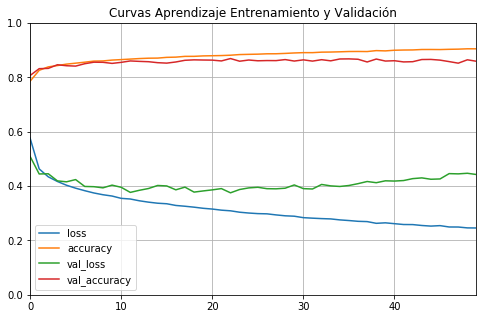

In [200]:
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.title("Curvas Aprendizaje Entrenamiento y Validación")
plt.show()

In [201]:
score = modeloMLP.evaluate(X_test_, y_test_, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.42696501519680025
Test accuracy: 0.865


### Se observa que el modelo preliminar tiene un buen comportamiento con accuracy %86 sobre el set de datos de validación.
### Las curvas de accuracy en entrenamiento y validación son cercanas lo que indica una buena generalización del modelo.
### Las curvas de perdida aumenta rápidamente en validación con respecto a entrenamiento, después de la época 20, donde la accuracy se mantiene en 86%., lo que podría indicar un sobre entrenamiento. Por lo que sería suficiente con entrenamiento en 20 épocas.

## Predicción del modelo MLP

In [328]:
#predict muestra la probabilidad asignada a cad clase a una instnacia dada
X_new = X_test_[52:56]
y_proba = modeloMLP.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.04, 0.  , 0.96, 0.  , 0.  ],
       [0.02, 0.  , 0.88, 0.  , 0.02, 0.  , 0.07, 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.98, 0.  , 0.01, 0.  , 0.01, 0.  , 0.  , 0.  ],
       [0.78, 0.  , 0.  , 0.  , 0.  , 0.  , 0.22, 0.  , 0.  , 0.  ]],
      dtype=float32)

In [329]:
# con predict_classes determian cual es la clase con mayor ptobabilidad para una instacia
y_pred = modeloMLP.predict_classes(X_new)
y_pred

array([7, 2, 2, 0], dtype=int64)

In [331]:
#Comparación  con la clasificacion real
print( y_test_[52], ", ", y_test_[53], ", " ,y_test_[54], ", ", y_test_[55])

7 ,  2 ,  2 ,  6


In [332]:
#Ver la clasifcacado a cada  clase
np.array(class_names)[y_pred]

array(['Sneaker', 'Pullover', 'Pullover', 'T-shirt/top'], dtype='<U11')

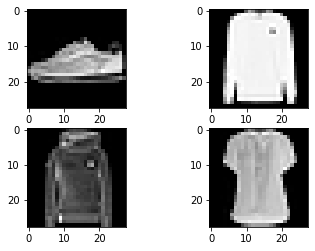

In [344]:
#Plot real de las  clases
# plot 4 images as gray scale
plt.subplot(221)
plt.imshow(X_train_full[52], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train_full[53], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train_full[54], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train_full[55], cmap=plt.get_cmap('gray'))


In [335]:
#Cometio error en la clase 0 cuando en realidad es 6
#Clasificando 'Shirt' como 'T-shirt/top' 

np.array(class_names)[6]

'Shirt'

## Validación del modelo 

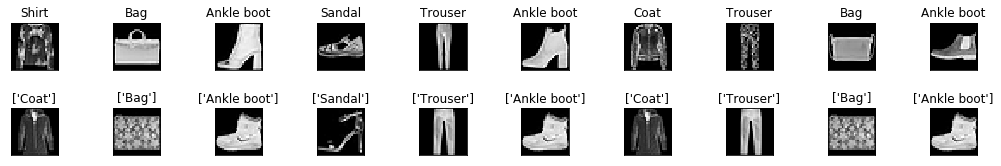

In [342]:
num_images = 10
np.random.seed(42)
X_real = X_train_full[:5000]
random_test_images = np.random.randint(X_real.shape[0], size=num_images)

plt.figure(figsize=(18, 4))

for i, image_idx in enumerate(random_test_images):
    # plot original imagen
    ax = plt.subplot(3, num_images, i + 1)
    plt.imshow(X_real[image_idx])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.subplots_adjust(hspace = .8)
    clase_real = np.array(class_names)[y_test_[image_idx]]
    ax.set_title(clase_real)
    
    # plot Clasificacion imagen
    ax = plt.subplot(3, num_images, num_images + i + 1)
    y_pred = modeloMLP.predict_classes(X_test_[image_idx].reshape(1,32))
    plt.imshow(img_ini[y_pred].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    clasificacion = np.array(class_names)[y_pred]
    ax.set_title(clasificacion)

    
plt.show()

## El general el modelo tiene un buen desempeño con accuracy del 86%, se observa que se equivoca clasificando Shirt como 'T-shirt/top' o 'Coat', como se ve en las imágenes